In [1]:
import numpy as np
import matplotlib.pyplot as plt


<img src="task 10.png">

In [2]:
L = 1 # x in [0; L]
t_to = 0.35 # t in [0; t_to]
# After 0.35 there is almost no changes in temperature

N = 1000     # Number of points for x
h = L / N    # Step over x

M = 10000   # Number of points for t
tau = t_to/M # Step over T

u0 = lambda x: x * (1. - x / L) ** 2 # Initial

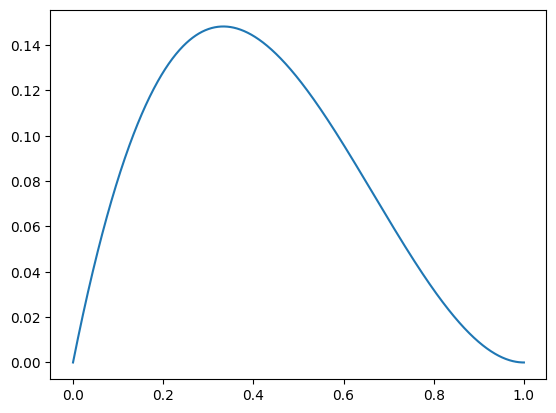

In [3]:
x = np.linspace(0, L, N)
plt.plot(x, u0(x))

In [4]:
def TridiagonalMatrix(p): # Sweeping method
    r = tau / h ** 2

    A = [0] + [-r for _ in range(N-2)] + [0]
    B = [1] + [2+2*r  for i in range(N-2)] + [1]
    C = [0] + [-r for _ in range(N-2)] + [0]

    D = [p[0]] + [r*p[i-1] + (2-2*r)*p[i] + r*p[i+1] for i in range(1, N-1)] + [p[-1]]

    # Forward step
    for i in range(1, N):
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]

    # Reverse step
    y = np.zeros(N)
    y[N - 1] = D[N - 1] / B[N - 1]
    for i in np.arange(N - 2, -1, -1):
        y[i] = (D[i] - C[i] * y[i + 1]) / B[i]
    return y

In [5]:
x = np.linspace(0, L, N)
t = np.linspace(0, t_to, M)

data = np.zeros((M, N))
data[0] = u0(x)

x_max = np.zeros(M)
u_max = np.zeros(M)

x_max[0] = x[data[0].argmax()]  # Find x in which u0 == max
u_max[0] = data[0].max()        # Get max(u0)


for i in range(1, M): # Calculating temperature over x on every T step
    data[i] = TridiagonalMatrix(data[i - 1])
    x_max[i], u_max[i] = x[data[i].argmax()], data[i].max()

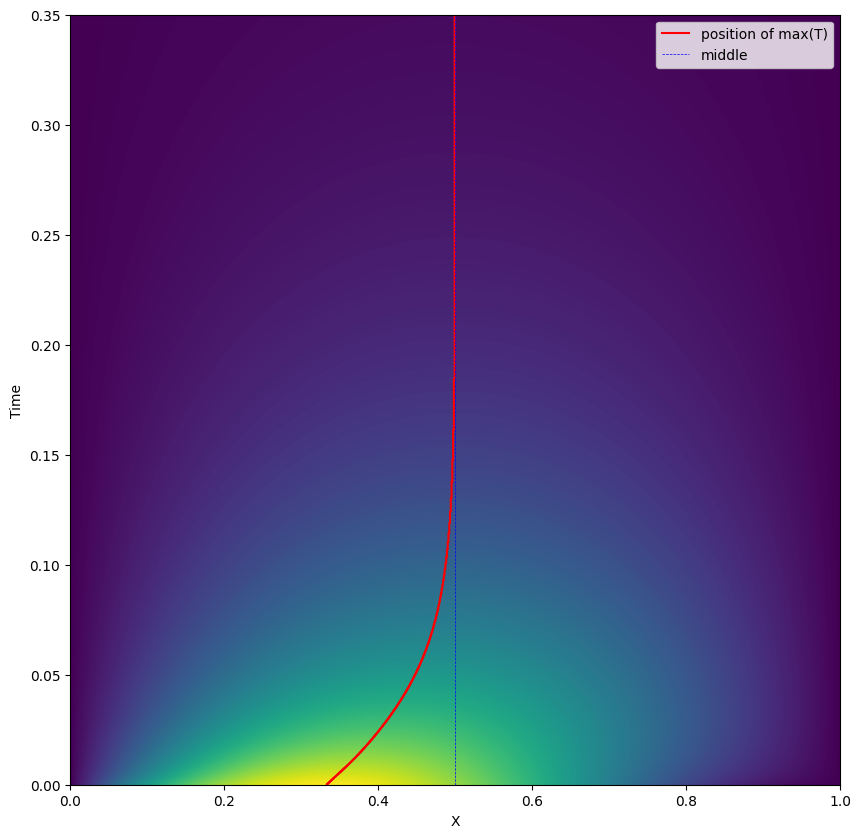

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

extent = 0, L, 0, t_to
ax.imshow(np.flip(data, axis=(0)), extent=extent)
ax.set_xlabel("X")
ax.set_ylabel("Time")

ax.set_aspect(L/t_to)

# ax.set_yscale("log")  # Use these 2 rows to see in log scale over T
# ax.set_aspect(L/t_to/10)

ax.plot(x_max, t, 'r', label="position of max(T)")
ax.vlines(L/2, ymin=0, ymax=t_to, linestyles="dashed", linewidth=0.5, colors=('b'), label="middle")


plt.legend()

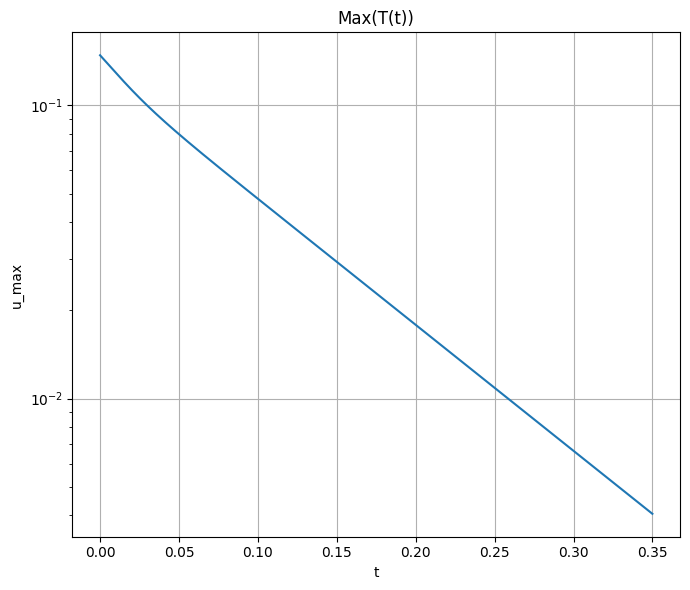

In [7]:
T = [i * tau for i in range(M)]
plt.figure(figsize=(7,6))

plt.plot(T, u_max)
plt.yscale('log')
plt.title('Max(T(t))')
plt.xlabel('t')
plt.ylabel('u_max')
plt.grid()

plt.tight_layout()
plt.show()